# Principal component analysis
- One way of reducing dimensionality is principal component analysis. It's an effective way of reducing the size of the data by creating new features that preserve the most useful information on a dataset while at the same time removing multicollinearity.
- **Task** : will be using the `sklearn.decomposition` module to perform PCA on the features of the diabetes dataset while isolating the target variable progression

In [1]:
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

In [6]:
# PCA : Instantiate a principal component analysis object to perform linear dimensionality reduction that returns 3 components
pca = PCA(n_components=3)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


### The first PC explains 40% of the variance with all 3 around 67%. Let's see if singular value decomposition gives different results!

# Singular Value Decomposition (SVD)
-  This particular transformer can work with sparse matrices efficiently, as opposed to PCA, and performs linear dimensionality reductions by way of truncated singular value decomposition.Recall that singular value decomposition takes the original data matrix, decomposes it into three matrices and uses them to calculate and return singular values.
- **Task** : SVD on the diabetes


In [7]:
from sklearn.decomposition import TruncatedSVD

In [8]:
# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

In [9]:
# SVD
svd = TruncatedSVD(n_components=3)

# Fit and transform
principalComponents = svd.fit_transform(X)

# Print ratio of variance explained
print(svd.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


### It looks like they both perform exactly the same with this dataset!

# t-SNE

In [13]:
# t-SNE with diabetes dataset
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 442 samples in 0.016s...
[t-SNE] Computed neighbors for 442 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 442 / 442
[t-SNE] Mean sigma: 0.060793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.123695
[t-SNE] KL divergence after 1000 iterations: 0.840457


In [12]:
diabetes['t-sne-PC-one'] = tsne_results[:,0]
diabetes['t-sne-PC-two'] = tsne_results[:,1]

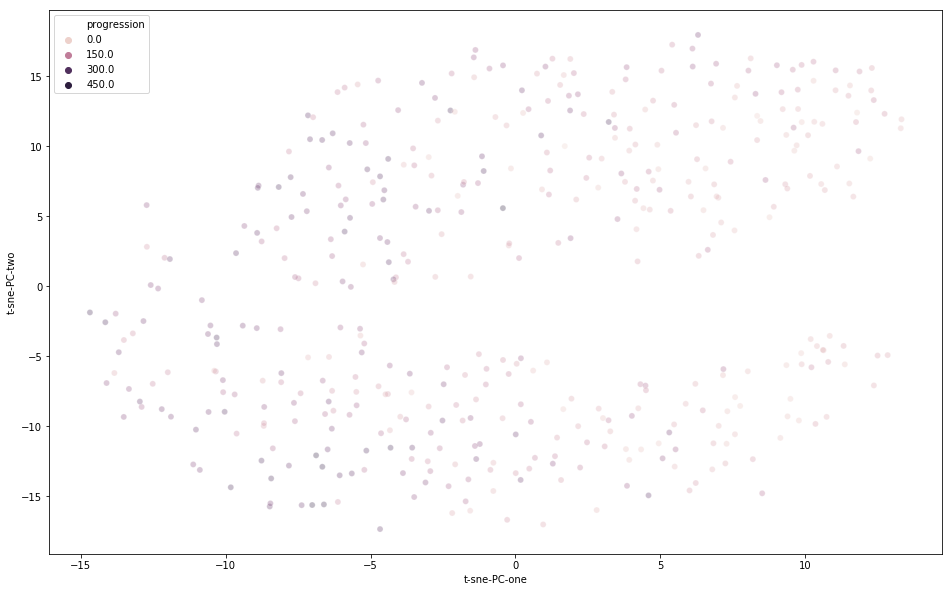

In [21]:
# t-sne viz
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="t-sne-PC-one", y="t-sne-PC-two",
    hue="progression",
#     palette=sns.color_palette(["green", "blue", "red"]),
    data=diabetes,
#     legends="full",
    alpha=0.3
)